Begin by importing the libraries needed for data cleaning and preparation.

In [1]:
import numpy as np
import pandas as pd

The next step is to read in the first dataset of interest, ADMISSIONS, and have a first look at the columns and rows. <br> 
This dataset was obtained from the MIMIC III database (https://mimic.physionet.org/).

In [2]:
admissions = pd.read_csv('ADMISSIONS.csv.gz', compression='gzip')
print(admissions.shape)
admissions.head(2)

(58976, 19)


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1


There are 58976 rows and 19 columns.

#### Columns of interest (or may be of interest) from the 'admissions' dataset include:
- HOSPITAL_EXPIRE_FLAG
- SUBJECT_ID
- HADM_ID
- ADMITTIME
- DEATHTIME
- ADMISSION_TYPE

In [3]:
# exploring the data to determine the datatypes, in particular, of the date columns.
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

Next, convert the dates to datetime format for processing.

In [4]:
#convert ADMITTIME and DEATHTIME to datetime format. The errors='coerce' argument allows for missing values
admissions.ADMITTIME = pd.to_datetime(admissions.ADMITTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
admissions.DEATHTIME = pd.to_datetime(admissions.DEATHTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

# check to see if there are any null dates
print('Number of missing date admissions:', admissions.ADMITTIME.isnull().sum())
print('Number of missing DEATHTIME:', admissions.DEATHTIME.isnull().sum())


Number of missing date admissions: 0
Number of missing DEATHTIME: 53122


In [5]:
# The next step is to add the target variable 'DEATH' which indicates whether or not a hospitalization resulted in death.
# positive death=1/negative death=0

#admissions['DEATH'] = admissions['DEATHTIME']>pd.Timestamp('00:00:00')
#admissions.DEATH.value_counts()
#print(admissions.DEATH.value_counts())
#print(admissions.DEATH.shape)

In [6]:
# I later realized that the column "HOSPITAL_EXPIRE_FLAG" is same as the "DEATH" column that was created.
# drop DEATH column
#admissions.drop('DEATH', axis=1, inplace=True)
#admissions.columns


In [7]:
admissions.HOSPITAL_EXPIRE_FLAG.value_counts()

0    53122
1     5854
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

5,854 out of 58,976 hospital admissions resulted in death (roughly 10%). Therefore, the dataset is imbalanced.

The 'admissions' dataframe is ready to go! <br>
<br>
Next: Read in the caregiver notes dataset and get an overview of its rows and features.


In [8]:
#Read in the caregiver notes dataset.

notes = pd.read_csv('NOTEEVENTS.csv.gz', compression='gzip', low_memory=False)
notes.head(2)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...


Columns of interest from the NOTES dataset:
- SUBJECT_ID
- HADM_ID
- NOTES
- CHARTDATE and CHARTTIME
- CATEGORY
- TEXT

In [9]:
notes.shape

(2083180, 11)

In [10]:
# Viewing categories of caregiver notes to better understand the dataset.
notes.CATEGORY.value_counts()


Nursing/other        822497
Radiology            522279
Nursing              223556
ECG                  209051
Physician            141624
Discharge summary     59652
Echo                  45794
Respiratory           31739
Nutrition              9418
General                8301
Rehab Services         5431
Social Work            2670
Case Management         967
Pharmacy                103
Consult                  98
Name: CATEGORY, dtype: int64

In [11]:
notes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


CHARTDATE records the date at which the note was charted. CHARTDATE will always have a time value of 00:00:00.

CHARTTIME records the date and time at which the note was charted. If both CHARTDATE and CHARTTIME exist, then the date portions will be identical. All records have a CHARTDATE. A subset are missing CHARTTIME. More specifically, notes with a CATEGORY value of ‘Discharge Summary’, ‘ECG’, and ‘Echo’ never have a CHARTTIME, only CHARTDATE. Other categories almost always have both CHARTTIME and CHARTDATE, but there is a small amount of missing data for CHARTTIME (usually less than 0.5% of the total number of notes for that category).

In [12]:
#convert the chart dates and times into datetime format

notes.CHARTTIME = pd.to_datetime(notes.CHARTTIME, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')
notes.CHARTDATE = pd.to_datetime(notes.CHARTDATE, format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')


# check to see if there are any null dates
print('Number of missing CHARTTIME:', notes.CHARTTIME.isnull().sum())
print('Number of missing CHARTDATE:', notes.CHARTDATE.isnull().sum())



Number of missing CHARTTIME: 316566
Number of missing CHARTDATE: 0


Since there are so many missing CHARTTIME values, CHARTDATE will be used for processing and analysis (see below). Before analyzing further, the dataframes will be merged.

In [13]:
# Merging the 'admissions' and 'notes' together. A left merge is used so that all rows for hospital admissions are included
# and any caregiver notes that are not associated with a hospital admission are dropped.
df=pd.merge(admissions[['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'HOSPITAL_EXPIRE_FLAG', 'ADMISSION_TYPE', 'DEATHTIME']],\
            notes[['SUBJECT_ID', 'HADM_ID', 'CHARTDATE', 'CATEGORY','TEXT']], \
            on=('HADM_ID','SUBJECT_ID') , how='left', suffixes=('adm','note'))
print('There are ', len(df), 'rows and ',len(df.columns), 'columns.')


There are  1851959 rows and  9 columns.


In [14]:
list(df.columns)

['SUBJECT_ID',
 'HADM_ID',
 'ADMITTIME',
 'HOSPITAL_EXPIRE_FLAG',
 'ADMISSION_TYPE',
 'DEATHTIME',
 'CHARTDATE',
 'CATEGORY',
 'TEXT']

Next a new column ENDTIME will be created. This will indicate the when to end note collection for analysis - i.e., 24 hours after ADMITTIME or at time of death - whichever is sooner.


In [15]:
df['ADMIT+24'] = df['ADMITTIME'] + pd.DateOffset(days=1)
df['ENDTIME'] = df['ADMIT+24']

df.ENDTIME = np.where(df['DEATHTIME'] < df['ENDTIME'], df['DEATHTIME']+pd.DateOffset(hours=-2), df['ENDTIME'])
df.head(20)

,SUBJECT_ID,HADM_ID,ADMITTIME,HOSPITAL_EXPIRE_FLAG,ADMISSION_TYPE,DEATHTIME,CHARTDATE,CATEGORY,TEXT,ADMIT+24,ENDTIME
0,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-10,Discharge summary,Admission Date: [**2196-4-9**] Discharg...,2196-04-10 12:26:00,2196-04-10 12:26:00
1,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-09,ECG,Normal sinus rhythm. Non-diagnostic repolariza...,2196-04-10 12:26:00,2196-04-10 12:26:00
2,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-09,ECG,Normal sinus rhythm without diagnostic abnorma...,2196-04-10 12:26:00,2196-04-10 12:26:00
3,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-10,Radiology,[**2196-4-10**] 11:52 PM\n CHEST (PORTABLE AP)...,2196-04-10 12:26:00,2196-04-10 12:26:00
4,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-09,Radiology,[**2196-4-9**] 10:19 AM\n CT HEAD W/O CONTRAST...,2196-04-10 12:26:00,2196-04-10 12:26:00
5,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-09,Radiology,[**2196-4-9**] 10:40 AM\n CHEST (PORTABLE AP) ...,2196-04-10 12:26:00,2196-04-10 12:26:00
6,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-09,Nursing/other,MICU/SICU NURSING ADMISSION NOTE\n Admitte...,2196-04-10 12:26:00,2196-04-10 12:26:00
7,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-09,Nursing/other,Resp Care\npt received from eu s/p intubation ...,2196-04-10 12:26:00,2196-04-10 12:26:00
8,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-10,Nursing/other,S/MICU Nursing Progress Note\nPt extubated at ...,2196-04-10 12:26:00,2196-04-10 12:26:00
9,22,165315,2196-04-09 12:26:00,0,EMERGENCY,NaT,2196-04-10,Nursing/other,PT TRANSFER NOTE PLEASE REFER TO ADMIT NOTE [*...,2196-04-10 12:26:00,2196-04-10 12:26:00


In [16]:
df.shape

(1851959, 11)

In [17]:
#update dataframe to only include notes taken within 24 hours of admission 
#or up until 2 hours before time of death if patient expired in the first 24 hours.

df2 = df[df['CHARTDATE'] <= df['ENDTIME']]

In [18]:
df2.shape

(444601, 11)

In [19]:
#Saving the merged dataframe.
df2.to_csv('df2.csv', index=False)

#### If restarting code, start with line below to begin with merged dataframe

In [20]:
import pandas as pd
import numpy
df2 = pd.read_csv('df2.csv')

In [21]:
#find out which samples died before admission and remove them from the dataframe. Save as new dataframe.
df3 = df2.loc[df2['ENDTIME'] > df2['ADMITTIME']]
#businesses = businesses.loc[businesses['categories'] == 'Restaurants']
df3.shape


(444228, 11)

In [22]:
#Locate the patients who died within 24 hours of admission

df2['diedin24'] = np.where(df2['DEATHTIME'] <= df2['ADMIT+24'], df2['DEATHTIME'], 'NaN')
df2.diedin24.value_counts()

NaN                    437727
2158-04-10 17:15:00        37
2114-02-22 07:28:00        36
2191-01-31 15:25:00        34
2147-12-19 10:48:00        31
                        ...  
2120-01-02 02:08:00         1
2153-05-27 09:45:00         1
2194-10-07 00:35:00         1
2195-09-23 00:40:00         1
2194-09-24 12:00:00         1
Name: diedin24, Length: 887, dtype: int64

In [23]:
#confirming data types and that there are no null values
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444228 entries, 0 to 444600
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   SUBJECT_ID            444228 non-null  int64 
 1   HADM_ID               444228 non-null  int64 
 2   ADMITTIME             444228 non-null  object
 3   HOSPITAL_EXPIRE_FLAG  444228 non-null  int64 
 4   ADMISSION_TYPE        444228 non-null  object
 5   DEATHTIME             48960 non-null   object
 6   CHARTDATE             444228 non-null  object
 7   CATEGORY              444228 non-null  object
 8   TEXT                  444228 non-null  object
 9   ADMIT+24              444228 non-null  object
 10  ENDTIME               444228 non-null  object
dtypes: int64(3), object(8)
memory usage: 40.7+ MB


In [24]:
#reordering the columns
df3 = df3[['HADM_ID', 'SUBJECT_ID', 'ADMITTIME', 'HOSPITAL_EXPIRE_FLAG', 'CHARTDATE', 'CATEGORY', 'TEXT', 'ENDTIME']]

In [25]:
# Having a look at the quantities of different categories of caregiver notes from the first 24 hours of admission. 
#For now include all categories. This may be somewhere that can be adjusted (i.e., include only notes from specific categories)
# based on the initial results of the machine learning model. Another option to consider is to combine all the text for each admission
# into one text row.
df3.CATEGORY.value_counts()

Radiology            131780
Nursing/other        121499
ECG                   70415
Nursing               56219
Physician             36577
Echo                  14635
Respiratory            5121
Discharge summary      2519
General                2515
Nutrition              1482
Social Work             650
Rehab Services          496
Case Management         265
Consult                  44
Pharmacy                 11
Name: CATEGORY, dtype: int64

The last step before beginning data analysis is to split the data into training and test sets.

In [26]:
# Preparing data further for ML model fitting, separating target variable from features

X = df3.drop(['HOSPITAL_EXPIRE_FLAG'], axis='columns') #feature columns
y = df3.HOSPITAL_EXPIRE_FLAG #target variable

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle=True, random_state=42)


In [27]:
#Confirming target variable counts
y.value_counts()

0    395268
1     48960
Name: HOSPITAL_EXPIRE_FLAG, dtype: int64

48960 out of 444528 patients expired while in the ICU.

In [28]:
# shuffle dataset in order to randomize all of the samples
df4 = df3.sample(n = len(df3), random_state = 42)
df4 = df4.reset_index(drop = True) #resetting index for the newly shuffled dataset

df_valid_test=df4.sample(frac=0.30,random_state=42) # Save 30% of the data as validation data.
df_test = df_valid_test.sample(frac = 0.5, random_state = 42) #Of the validation data, 50% is set aside for testing 
df_valid = df_valid_test.drop(df_test.index) #dropping the index for the validation data

df_train_all=df4.drop(df_valid_test.index) # remove the rows used for validation; We are left with the rest of the data which will be used for training


In [29]:
df_train_all.head()

,HADM_ID,SUBJECT_ID,ADMITTIME,HOSPITAL_EXPIRE_FLAG,CHARTDATE,CATEGORY,TEXT,ENDTIME
0,129733,31458,2173-11-07 01:42:00,0,2173-11-07 00:00:00,Nursing/other,Umbilical Line Placement\nIndication: central ...,2173-11-08 01:42:00
1,186254,87687,2118-11-04 16:18:00,0,2118-11-04 00:00:00,ECG,Sinus tachycardia suggested with frequent atri...,2118-11-05 16:18:00
3,124768,13912,2172-09-09 22:24:00,0,2172-09-09 00:00:00,Radiology,[**2172-9-9**] 8:51 PM\n CTA NECK W&W/OC & REC...,2172-09-10 22:24:00
4,177614,26509,2121-03-11 10:15:00,0,2121-03-12 00:00:00,Radiology,[**2121-3-12**] 10:11 AM\n UGI SGL CONTRAST W/...,2121-03-12 10:15:00
5,158867,32078,2183-08-06 21:09:00,0,2183-08-06 00:00:00,ECG,Sinus rhythm with borderline sinus tachycardia...,2183-08-07 21:09:00


Now, working with the training data, split the data into 2 categories based on mortality.

In [30]:
# split the training data into positive (death) and negative (no death)
positive = df_train_all.HOSPITAL_EXPIRE_FLAG == 1
df_train_pos = df_train_all.loc[positive]
df_train_neg = df_train_all.loc[~positive]
print('There are ', len(df_train_pos), 'positive samples and ', len(df_train_neg), 'negative samples.')
print('Percent positive samples: ', round(len(df_train_pos)*100/len(df_train_all),2),'%')

There are  34245 positive samples and  276715 negative samples.
Percent positive samples:  11.01 %


There is an imbalance in positive vs negative cases, which would be expected in this dataset. Therefore balancing the data is needed, so that the machine learning model does not always predict negative (no death). Sub-sampling the negative group is one method of doing this.

In [31]:
#sub-sample negatives so there are an equal number of positive and negative samples.
df_train_neg = df_train_neg.sample(n=len(df_train_pos), random_state=42)

# merge the positive and negative samples into the final training set
df_train_final = pd.concat([df_train_pos, df_train_neg],axis = 0)

# shuffle the order of training samples 
df_train_final = df_train_final.sample(n = len(df_train_final), random_state = 42).reset_index(drop = True)

In [32]:
len(df_train_final)

68490

### Step 2: Preprocess text data using Bag of Words model.
#### What is Bag of Words?
<br>
Bag of Words is a method for extracting features from the text for use in machine learning algorithms. Basically, it breaks up a text into individual words, then counts how often each word occurs.


In [33]:
#viewing an example row of the text column
df_train_final.TEXT[1]

'[**2116-11-9**] 1:09 PM\n CHEST (PORTABLE AP); -76 BY SAME PHYSICIAN                      [**Name Initial (PRE) 7**] # [**Clip Number (Radiology) 51803**]\n Reason: ? L side pnthx\n Admitting Diagnosis: SDH/SAH\n ______________________________________________________________________________\n [**Hospital 2**] MEDICAL CONDITION:\n  22 year old man with [**Month (only) 1158**] O2 sats and hypotension\n REASON FOR THIS EXAMINATION:\n  ? L side pnthx\n ______________________________________________________________________________\n PROVISIONAL FINDINGS IMPRESSION (PFI): DLnc MON [**2116-11-9**] 7:38 PM\n  New right lower lobe opacity:  Aspiration/atelectasis.  Discussed with Dr.\n  [**Last Name (STitle) 1586**] over the phone by Dr. [**Last Name (STitle) 236**].\n ______________________________________________________________________________\n                                 FINAL REPORT\n REASON FOR EXAMINATION:  Hypertension.\n\n Portable AP chest radiograph was compared to [**2116-11-9

The text above shows that it needs some pre-processing (mainly removing the new line command ('\n'). One way to do this is to create a function to preprocess the text. This way the original data won't be modified.

In [34]:
def preprocess_text(df4):
    # This function preprocesses the text by replacing new lines ('\n')  with a space.
    df4.TEXT = df4.TEXT.str.replace('\n',' ')
    return df4
# preprocess the text to deal with known issue
df_train_final = preprocess_text(df_train_final)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)

In [35]:
df_train_final.TEXT[1]

'[**2116-11-9**] 1:09 PM  CHEST (PORTABLE AP); -76 BY SAME PHYSICIAN                      [**Name Initial (PRE) 7**] # [**Clip Number (Radiology) 51803**]  Reason: ? L side pnthx  Admitting Diagnosis: SDH/SAH  ______________________________________________________________________________  [**Hospital 2**] MEDICAL CONDITION:   22 year old man with [**Month (only) 1158**] O2 sats and hypotension  REASON FOR THIS EXAMINATION:   ? L side pnthx  ______________________________________________________________________________  PROVISIONAL FINDINGS IMPRESSION (PFI): DLnc MON [**2116-11-9**] 7:38 PM   New right lower lobe opacity:  Aspiration/atelectasis.  Discussed with Dr.   [**Last Name (STitle) 1586**] over the phone by Dr. [**Last Name (STitle) 236**].  ______________________________________________________________________________                                  FINAL REPORT  REASON FOR EXAMINATION:  Hypertension.   Portable AP chest radiograph was compared to [**2116-11-9**] obtained at  

Now import Python's Natural Language Toolkit (NLTK) and other necessary modules

In [36]:
import nltk
from nltk import word_tokenize
import string # String module provides tools to manipulate strings
from nltk.corpus import stopwords

Next create a function to separate the text data into tokens (this is called tokenization). Tokens created here will be used to make a vocabulary (set of unique tokens) to be used as a feature for the model. All tokens or top K tokens can be used 

In [37]:
def text_tokenizer(text): # create a function that will tokenize the text, and also remove punctuation and numbers
    
    punc_list = string.punctuation #create list of punctuation marks
    number_list=string.digits #create list of numbers
    num_punc_list = number_list + punc_list #combine the lists together
    t = str.maketrans(dict.fromkeys(num_punc_list, " ")) # replace punctuation and numbers with spaces
    text = text.lower().translate(t) #lowercase all words
    tokens = word_tokenize(text) #tokenize the text 
    return tokens

Now that tokens can be created from the text, CountVectorizer will turn these tokens into number features to be used in the machine learning model. But first a list of stopwords will be created so that the machine can ignore these words when processing the tokens.

In [38]:
nltk.download('stopwords')

stopwords = set(stopwords.words('english')) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
import nltk
nltk.download('punkt')
# fit our vectorizer. 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = text_tokenizer, stop_words = stopwords)
vect.fit(df_train_final.TEXT.values)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\caras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(max_features=3000,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                tokenizer=<function text_tokenizer at 0x000001C75AB950D0>)

In [40]:
print(vect.vocabulary_)
print(type(vect))
print(vect.fixed_vocabulary_)

{'nsg': 1802, 'admit': 50, 'note': 1790, 'pt': 2138, 'male': 1573, 'hospital': 1225, 'ward': 2927, 'name': 1724, 'today': 2731, 'mra': 1695, 'lt': 1540, 'leg': 1469, 'hx': 1240, 'cva': 634, 'tia': 2712, 'residual': 2283, 'sided': 2446, 'weakness': 2938, 'numbness': 1808, 'car': 372, 'alone': 87, 'witnessed': 2971, 'wall': 2924, 'taken': 2650, 'er': 907, 'gcs': 1108, 'became': 262, 'hypotensive': 1264, 'sbp': 2373, 'given': 1123, 'bolus': 309, 'ct': 623, 'grossly': 1151, 'heme': 1191, 'exp': 950, 'lap': 1443, 'repair': 2257, 'lg': 1489, 'mesenteric': 1632, 'bleed': 298, 'vessel': 2893, 'bladder': 296, 'liver': 1512, 'abdomen': 3, 'left': 1467, 'open': 1851, 'jp': 1409, 'x': 2985, 'covered': 605, 'dsg': 820, 'l': 1427, 'u': 2809, 'lr': 1538, 'sicu': 2444, 'ed': 847, 'pmh': 2016, 'sh': 2430, 'nkda': 1769, 'cad': 355, 'p': 1890, 'mi': 1642, 'h': 1162, 'rt': 2344, 'frontal': 1083, 'bilat': 282, 'central': 414, 'artery': 179, 'occlusion': 1831, 'lumbar': 1543, 'syncope': 2633, 'meds': 1622, 

In [41]:
df_train_final.head()


,HADM_ID,SUBJECT_ID,ADMITTIME,HOSPITAL_EXPIRE_FLAG,CHARTDATE,CATEGORY,TEXT,ENDTIME
0,156361,1822,2148-07-08 13:25:00,1,2148-07-08 00:00:00,Nursing/other,NSG ADMIT NOTE: PT IS AN 86Y/O MALE WHO WAS AT...,2148-07-09 13:25:00
1,182221,48374,2116-11-08 08:31:00,1,2116-11-09 00:00:00,Radiology,[**2116-11-9**] 1:09 PM CHEST (PORTABLE AP); ...,2116-11-09 08:31:00
2,148295,17863,2144-01-28 20:18:00,1,2144-01-28 00:00:00,ECG,Indeterminate supraventricular rhtyhm with sli...,2144-01-29 20:18:00
3,110348,6258,2124-12-24 12:38:00,1,2124-12-24 00:00:00,Physician,Chief Complaint: Transfer from [**Hospital1 3...,2124-12-25 12:38:00
4,130611,53858,2121-11-25 22:49:00,1,2121-11-25 00:00:00,Radiology,[**2121-11-25**] 9:11 PM CT ABDOMEN W/O CONTR...,2121-11-26 22:49:00


We can get an idea of the frequency of words for positive vs negative mortality. This section was based on code from https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-2-333514854913

In [42]:
#Next visualize find the most frequent words.

import matplotlib.pyplot as plt

neg_doc_matrix = vect.transform(df_train_final[df_train_final.HOSPITAL_EXPIRE_FLAG == 0].TEXT)
pos_doc_matrix = vect.transform(df_train_final[df_train_final.HOSPITAL_EXPIRE_FLAG == 1].TEXT)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:20]


,negative,positive,total
pt,48578,54646,103224
left,39894,48259,88153
right,35534,45945,81479
name,36137,40619,76756
mg,32714,30161,62875
ml,29879,25869,55748
hospital,24828,29068,53896
patient,24193,29639,53832
l,27150,25320,52470
reason,22402,27819,50221


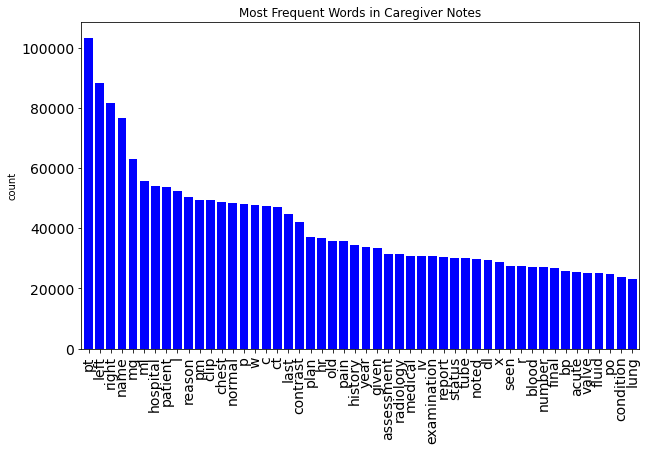

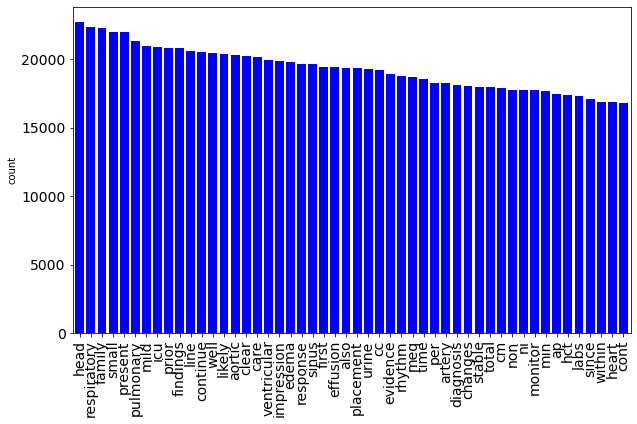

In [43]:
#Create a series from the sparse matrix
d = pd.Series(term_freq_df.total, 
              index = term_freq_df.index).sort_values(ascending=False)

#Visualize the 100 most frequent words in the text
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.title('Most Frequent Words in Caregiver Notes')
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()

In [44]:
#with np.printoptions(threshold=np.inf):
 #   print(neg_doc_matrix)

In [45]:
stopwords_updated = list(stopwords) + ['pt', 'left', 'right', 'name','patient', 'p','w','c']


Add the list of stop words as an argument for CountVectorizer

In [46]:

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, 
                       tokenizer = text_tokenizer, 
                       stop_words = stopwords_updated)
# this will take a while
vect.fit(df_train_final.TEXT.values)

C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(max_features=3000,
                stop_words=["she's", 'himself', 'couldn', 'here', 'what', 'of',
                            'mightn', "should've", 'mustn', 'will', 'further',
                            "shan't", 'because', 'after', 'if', 'y', 'herself',
                            'an', 'ma', 'is', 'under', "haven't", 'who', 'them',
                            'than', 'up', "wasn't", 'you', 'then', 'or', ...],
                tokenizer=<function text_tokenizer at 0x000001C75AB950D0>)

In [47]:
#Again visualize find the most frequent words.

import matplotlib.pyplot as plt

neg_doc_matrix = vect.transform(df_train_final[df_train_final.HOSPITAL_EXPIRE_FLAG == 0].TEXT)
pos_doc_matrix = vect.transform(df_train_final[df_train_final.HOSPITAL_EXPIRE_FLAG == 1].TEXT)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:20]


,negative,positive,total
mg,32714,30161,62875
ml,29879,25869,55748
hospital,24828,29068,53896
l,27150,25320,52470
reason,22402,27819,50221
pm,22828,26602,49430
clip,22141,27110,49251
chest,23621,25181,48802
normal,27351,20950,48301
ct,20159,26800,46959


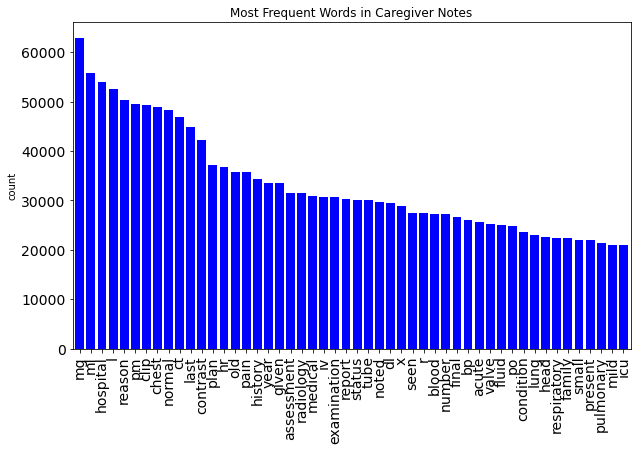

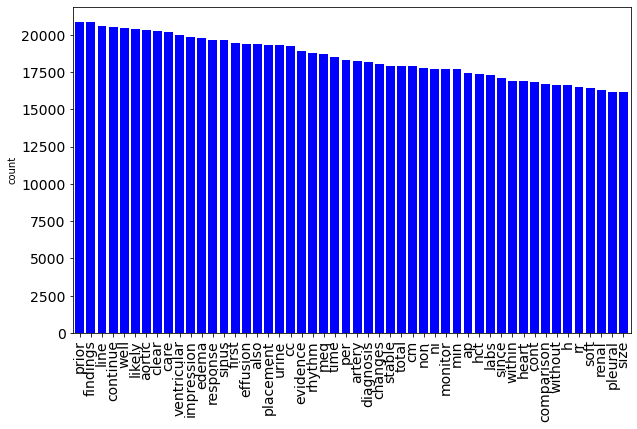

In [48]:
#Again Create a series from the sparse matrix
d = pd.Series(term_freq_df.total, 
              index = term_freq_df.index).sort_values(ascending=False)

#Visualize the 100 most frequent words in the text
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.title('Most Frequent Words in Caregiver Notes')
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()

Transform the text samples into vectors

In [49]:
X_train_vect = vect.transform(df_train_final.TEXT.values)
X_valid_vect = vect.transform(df_valid.TEXT.values)

In [50]:
X_train_vect.shape

(68490, 3000)

Get labels (target variable)

In [51]:
y_train = df_train_final.HOSPITAL_EXPIRE_FLAG
y_valid = df_valid.HOSPITAL_EXPIRE_FLAG

Step 3: Build a simple predictive model

In [52]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state = 42, solver='lbfgs')
clf.fit(X_train_vect, y_train)

C:\Users\caras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [53]:
#import other models for evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from libxgboost import XGBClassifier
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier(random_state=42, n_estimators=100)
knn =  KNeighborsClassifier()
svm = SVC(random_state=42, gamma='auto')
gnb = GaussianNB()
#xgboost = XGBClassifier(random_state=42)


#rf.fit(X_train_vect, y_train)


#knn.fit(X_train_vect, y_train)

#svm.fit(X_train_vect, y_train)

gnb.fit(X_train_vect.toarray(), y_train)

#xgboost.fit(X_train_vect, y_train)
#y_pred = xgboost.predict(X_test_scaled)
#print("XGBoost: ", xgboost.score(X_test_scaled, y_test))

GaussianNB()

Calculate probability of death - other models took too long, so continued on only with logistic regression and naive bayes.

In [54]:
model = clf
y_train_preds = model.predict_proba(X_train_vect)[:,1]
y_valid_preds = model.predict_proba(X_valid_vect)[:,1]

In [55]:
model = gnb
y_train_preds_gnb = model.predict_proba(X_train_vect.toarray())[:,1]
y_valid_preds_gnb = model.predict_proba(X_valid_vect.toarray())[:,1]

In [56]:
#Print mortality predictions for the first 10 samples in the training set
print(y_train[:10].values)
print(y_train_preds[:10])


[1 1 1 1 1 0 0 0 0 1]
[7.56882037e-01 6.14849412e-01 6.41002700e-01 9.90711476e-01
 7.59401056e-01 7.39102779e-01 5.62297285e-01 8.37652759e-02
 1.26228910e-05 7.64528372e-01]


Calculate performance metrics

In [57]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)


Logistic Regression Performance Metrics

Train AUC:0.832
Valid AUC:0.791
Train accuracy:0.745
Valid accuracy:0.710
Train recall:0.753
Valid recall:0.711
Train precision:0.741
Valid precision:0.237
Train specificity:0.737
Valid specificity:0.709
Train prevalence:0.500
Valid prevalence:0.113


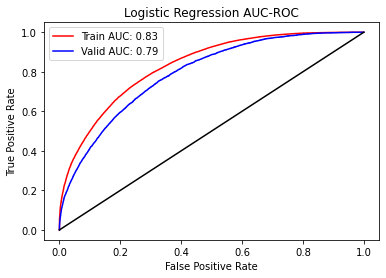

In [58]:
#LOGISTIC REGRESSION
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

print("\nLogistic Regression Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.title('Logistic Regression AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Naive Bayes Performance Metrics

Train AUC:0.733
Valid AUC:0.791
Train accuracy:0.657
Valid accuracy:0.710
Train recall:0.548
Valid recall:0.711
Train precision:0.701
Valid precision:0.237
Train specificity:0.766
Valid specificity:0.709
Train prevalence:0.500
Valid prevalence:0.113


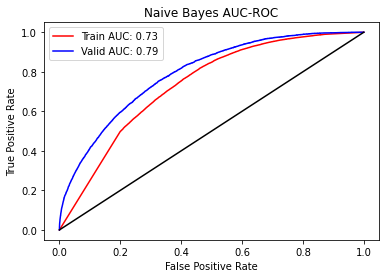

In [59]:
#GNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds_gnb)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds_gnb)
auc_valid = roc_auc_score(y_valid, y_valid_preds)
print("\nNaive Bayes Performance Metrics\n")
print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds_gnb, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))


print('Train recall:%.3f'%calc_recall(y_train, y_train_preds_gnb, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds_gnb, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds_gnb, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.title('Naive Bayes AUC-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Since the performance metrics results and AUC-ROC fared better with Logistic Regression, that will be the model of choice for the remainder of this project.
#### The remainder of this analysis will focus on feature engineering and hyperparameter optimization in order to create a stronger algorithm to predict mortality. 

### Feature Engineering

In [60]:
#First find the features that the classifier is using to make decisions:

def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(vect, clf, 25)

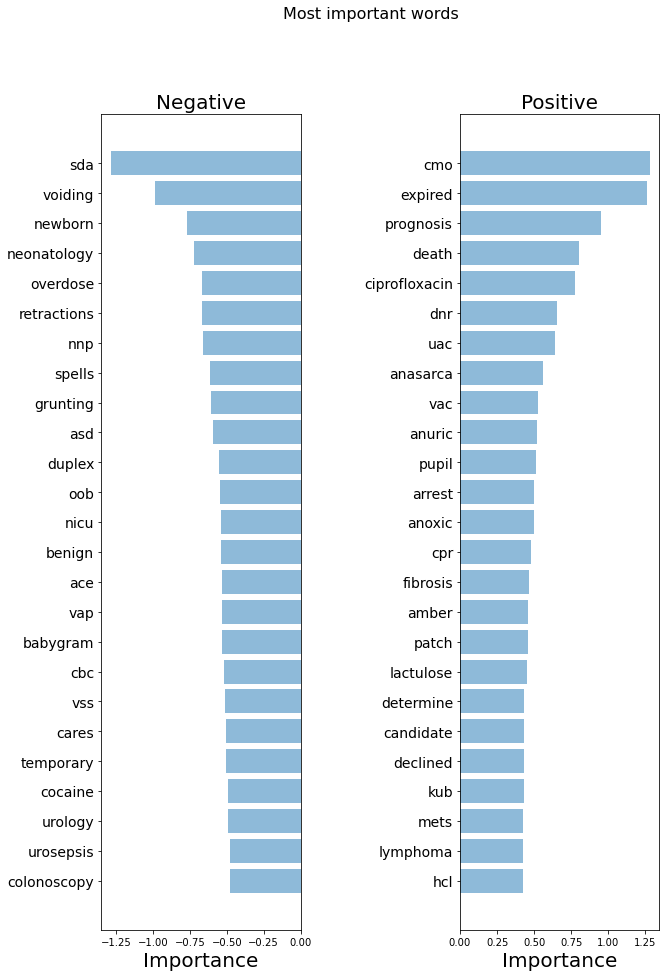

In [61]:
#Next, plot the most important features

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 15))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Negative', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

    
  
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words")


'Expired' is very high in the list, therefore will try removing patients who expired within 24 hours of admission.

### Hyperparameter tuning

In [62]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Number of Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

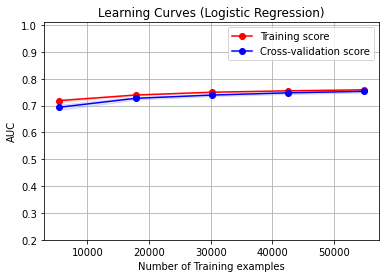

In [63]:

title = "Learning Curves (Logistic Regression)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = LogisticRegression( C = 0.0001, penalty = 'l2')#
plot_learning_curve(estimator, title, X_train_vect, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()


I understand that larger number of training samples means that cross-validation AUC gets closer to training score, but what is significance in this case? That we don't need to use so many training samples? Need help interpreting this.

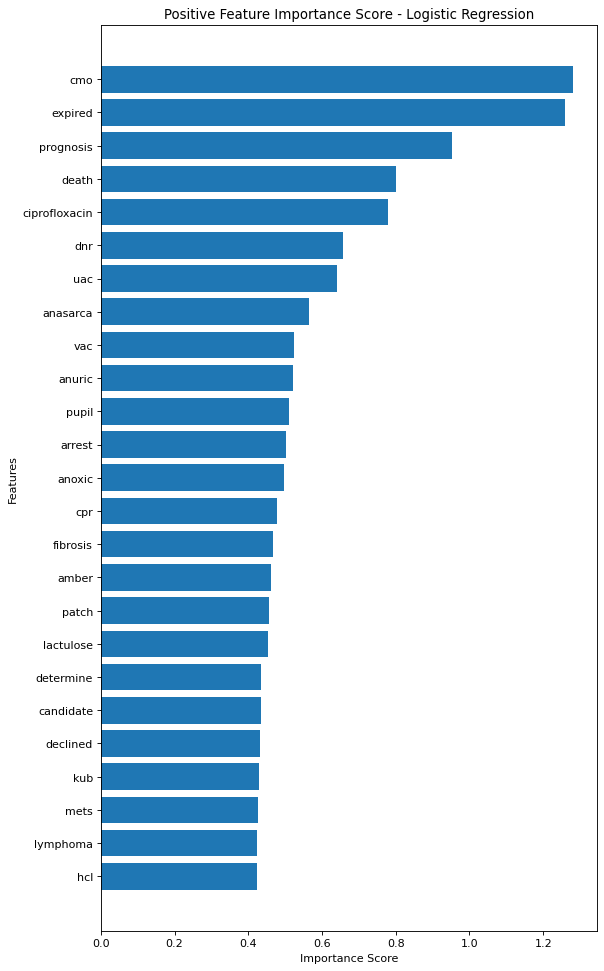

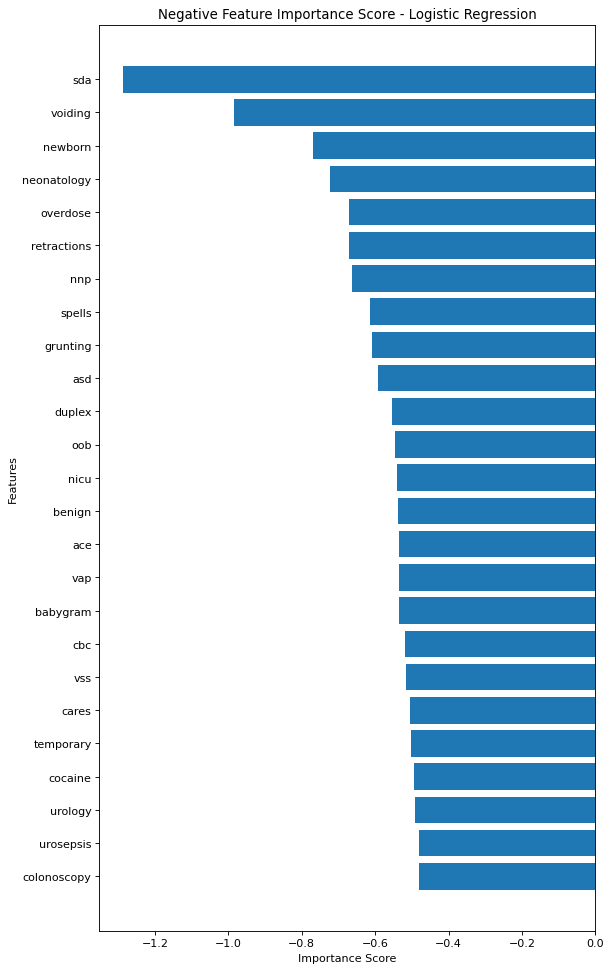

In [64]:
#Look at the most important words for the model.

feature_importances = pd.DataFrame(clf.coef_[0],
                                   index = vect.get_feature_names(),
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)




num=25
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()





values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()





 C: 0.0001
Train AUC:0.763
Valid AUC:0.756

 C: 0.001
Train AUC:0.802
Valid AUC:0.786

 C: 0.01


C:\Users\caras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train AUC:0.825
Valid AUC:0.796

 C: 1


C:\Users\caras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train AUC:0.832
Valid AUC:0.791

 C: 2


C:\Users\caras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train AUC:0.832
Valid AUC:0.791

 C: 5
Train AUC:0.832
Valid AUC:0.791


C:\Users\caras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


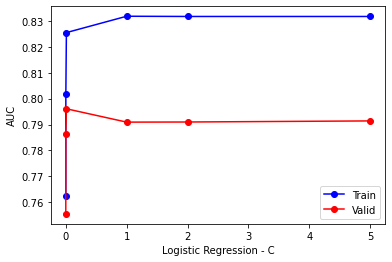


number of features: 100


C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train AUC: 0.677
Valid AUC:0.675

number of features: 300


C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train AUC: 0.717
Valid AUC:0.712

number of features: 1000


C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train AUC: 0.750
Valid AUC:0.745

number of features: 3000


C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train AUC: 0.763
Valid AUC:0.756

number of features: 10000


C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train AUC: 0.765
Valid AUC:0.757

number of features: 30000


C:\Users\caras\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train AUC: 0.765
Valid AUC:0.757


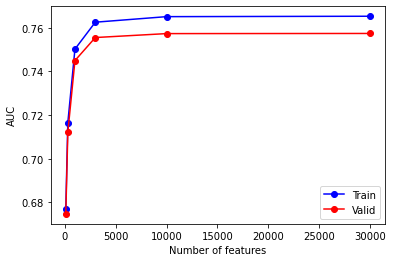

In [65]:
# Find best value of C


from sklearn.linear_model import LogisticRegression

Cs = [0.0001, 0.001, 0.01, 1, 2, 5]
train_aucs = np.zeros(len(Cs))
valid_aucs = np.zeros(len(Cs))

for ii in range(len(Cs)):
    C = Cs[ii]
    print('\n C:', C)
    
    # logistic regression
    
    clf=LogisticRegression(C = C, penalty = 'l2', random_state = 42)
    clf.fit(X_train_vect, y_train)

    model = clf
    y_train_preds = model.predict_proba(X_train_vect)[:,1]
    y_valid_preds = model.predict_proba(X_valid_vect)[:,1]

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    print('Train AUC:%.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid





plt.plot(Cs, train_aucs,'bo-', label ='Train')
plt.plot(Cs, valid_aucs, 'ro-', label='Valid')
plt.legend()
plt.xlabel('Logistic Regression - C')
plt.ylabel('AUC')
plt.show()





#Effect of Max_features





num_features = [100,300,1000,3000,10000,30000]
train_aucs = np.zeros(len(num_features))
valid_aucs = np.zeros(len(num_features))

for ii in range(len(num_features)):
    num = num_features[ii]
    print('\nnumber of features:', num)
    vect = CountVectorizer(lowercase = True, max_features = num, 
                           tokenizer = text_tokenizer,stop_words =stopwords_updated)

    # This could take a while
    vect.fit(df_train_final.TEXT.values)

    X_train_vect = vect.transform(df_train_final.TEXT.values)
    X_valid_vect = vect.transform(df_valid.TEXT.values)
    y_train = df_train_final.HOSPITAL_EXPIRE_FLAG
    y_valid = df_valid.HOSPITAL_EXPIRE_FLAG
    
    clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
    clf.fit(X_train_vect, y_train)

    model = clf
    y_train_preds = model.predict_proba(X_train_vect)[:,1]
    y_valid_preds = model.predict_proba(X_valid_vect)[:,1]

    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)
    print('Train AUC: %.3f'%auc_train)
    print('Valid AUC:%.3f'%auc_valid)
    train_aucs[ii] = auc_train
    valid_aucs[ii] = auc_valid

plt.plot(num_features, train_aucs,'bo-', label ='Train')
plt.plot(num_features, valid_aucs, 'ro-', label='Valid')
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('AUC')
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

clf_param_grid = {'penalty': ['l1','l2'],
                  'C': [0.001, 0.01, 0.1, 1, 2, 5],
                  'class_weight': [{1:0.5, 0:0.5}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}, {1:0.8, 0:0.2}, {1:0.9, 0:0.1}]
                   }
clf = GridSearchCV(
    estimator=clf,
    param_grid=clf_param_grid,               
    n_jobs=-1,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5,shuffle=True))
logistic_best_model = clf.fit(X_train_vect, y_train)

print('Best Logistic Score (F1): ', logistic_best_model.best_score_)
print('Best Logistic Parameters: ', logistic_best_model.best_params_)

Best Logistic Score (F1):  0.7521746981847593
Best Logistic Parameters:  {'C': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2'}


C:\Users\caras\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
